# Modelo Arima - Estudos Part26 Séries Temporais

In [13]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

C:\estudos_coleta_dados\virtualenv\estudos_dados\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


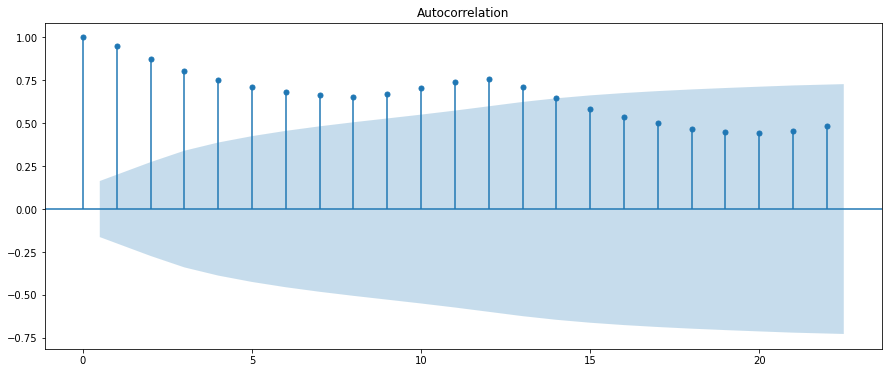

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# gerando o diagrama de autocorrelação
plot_acf(data)
plt.show()

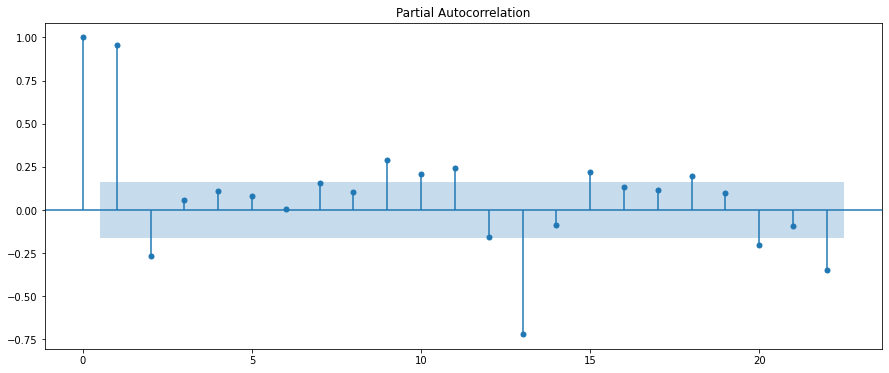

In [4]:
# gerando o diagrama de autocorrelação parcial
plot_pacf(data)
plt.show()

In [5]:
# Importando a biblioteca do modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [12]:
# criando o modelo 
# O modelo ARIMA tem uma ordem, o pdq (p- é a ordem da parte regressiva / d- o grau de diferenciação/ q- a ordem da media movel)

model = ARIMA(data, order=(2,1,0))
model_fit = model.fit() 
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -695.294
Date:                Fri, 14 Jan 2022   AIC                           1396.588
Time:                        15:11:39   BIC                           1405.476
Sample:                    01-01-1949   HQIC                          1400.200
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3815      0.088      4.351      0.000       0.210       0.553
ar.L2         -0.2279      0.065     -3.518      0.000      -0.355      -0.101
sigma2       977.5538    111.534      8.765      0.0

C:\estudos_coleta_dados\virtualenv\estudos_dados\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\estudos_coleta_dados\virtualenv\estudos_dados\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\estudos_coleta_dados\virtualenv\estudos_dados\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


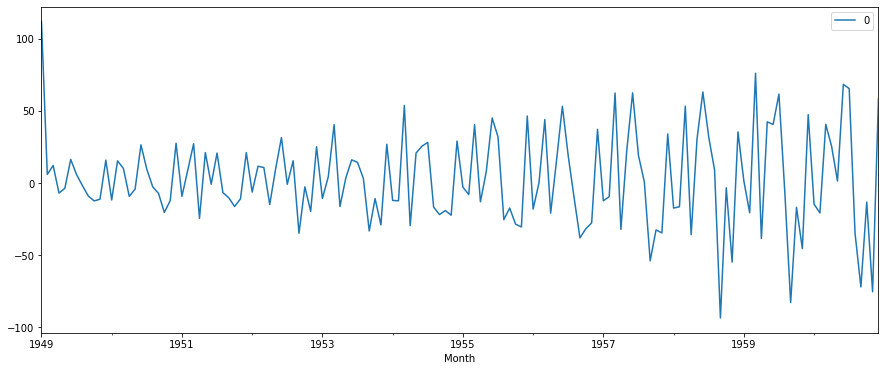

In [14]:
# imprimindo os residuais do modelo
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

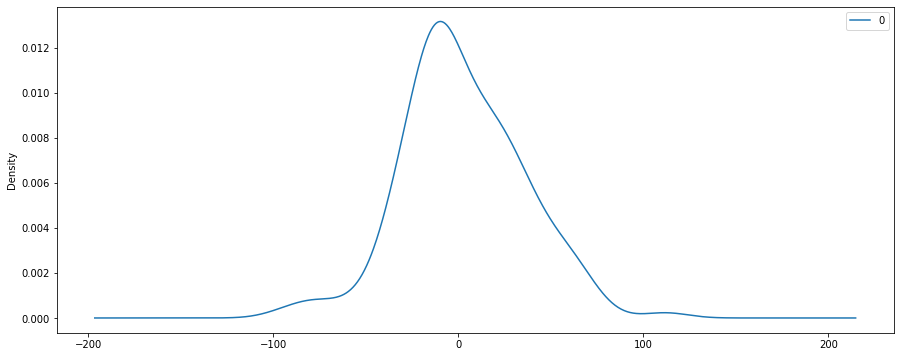

<bound method NDFrame.describe of                      0
Month                 
1949-01-01  112.000000
1949-02-01    5.960334
1949-03-01   12.161732
1949-04-01   -6.973551
1949-05-01   -3.665568
...                ...
1960-08-01  -34.833603
1960-09-01  -72.072792
1960-10-01  -13.260860
1960-11-01  -75.400515
1960-12-01   58.375665

[144 rows x 1 columns]>


In [16]:
# gerando um diagrama de densidade dos residuos
residuals.plot(kind='kde')
plt.show()
print(residuals.describe)

In [20]:
# avaliando a qualidade do modelo
X = data.values

Previsto=364.400027, esperado=340.000000
Previsto=349.153668, esperado=318.000000
Previsto=318.664613, esperado=362.000000
Previsto=381.603529, esperado=348.000000
Previsto=342.840336, esperado=363.000000
Previsto=367.178864, esperado=435.000000
Previsto=446.799855, esperado=491.000000
Previsto=485.173920, esperado=505.000000
Previsto=480.487973, esperado=404.000000
Previsto=347.365832, esperado=359.000000
Previsto=350.132318, esperado=310.000000
Previsto=310.830768, esperado=337.000000
Previsto=368.118819, esperado=360.000000
Previsto=378.278244, esperado=342.000000
Previsto=342.524243, esperado=406.000000
Previsto=427.915168, esperado=396.000000
Previsto=384.058370, esperado=420.000000
Previsto=418.751833, esperado=472.000000
Previsto=471.393042, esperado=548.000000
Previsto=545.335920, esperado=559.000000
Previsto=526.995082, esperado=463.000000
Previsto=402.823748, esperado=407.000000
Previsto=388.479819, esperado=362.000000
Previsto=361.101747, esperado=405.000000
Previsto=437.013

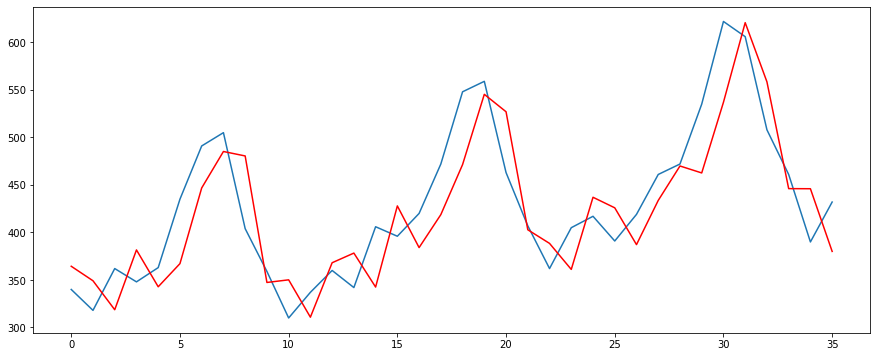

In [25]:
# criando um treino e um teste para o modelo
size = int(len(X) * 0.75)
train, test= X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Previsto=%f, esperado=%f'%(yhat, obs))
    
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()